<a href="https://colab.research.google.com/github/calipso82/MIAD_NLP_2024/blob/main/S1TC1_arboles_ensamblajes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

**Variable "season":**
La variable "season" representa la estación del año (1: primavera, 2: verano, 3: otoño, 4: invierno).
El promedio de alquiler de bicicletas es más bajo en la primavera (116.34) y más alto en el otoño (234.42), seguido por el verano (215.25) y el invierno (198.99).
Esto sugiere que el otoño es la temporada más popular para alquilar bicicletas, mientras que la primavera es la menos popular.

**Variable "hour":**
La variable "hour" representa la hora del día.
El promedio de alquiler de bicicletas es bajo durante las primeras horas de la mañana y durante la madrugada (de 0 a 4 horas), con un aumento marcado a partir de las 5 a.m.
Se observa un pico en los alquileres de bicicletas entre las 7 a.m. y las 8 a.m., lo que sugiere un uso intensivo de bicicletas durante las horas de la mañana, probablemente debido a las personas que se dirigen al trabajo o a otras actividades.
Otra hora con un pico significativo es entre las 5 p.m. y las 6 p.m., lo que indica un uso elevado de bicicletas durante las horas de la tarde, probablemente debido a las personas que regresan a casa después del trabajo.
Las horas nocturnas (desde las 7 p.m. hasta las 4 a.m.) tienen un promedio de alquiler de bicicletas más bajo en comparación con las horas del día.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

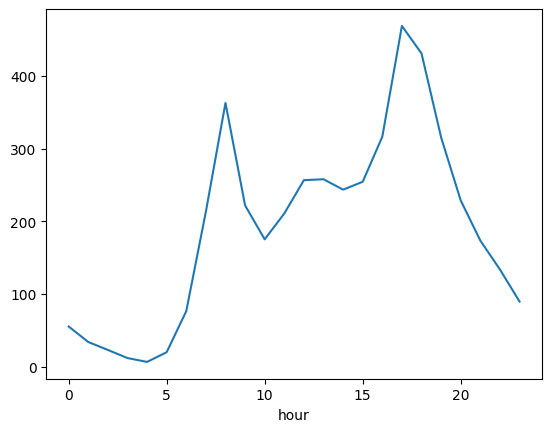

In [6]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<Axes: title={'center': 'Rentas promedio por hora en invierno'}, xlabel='Hora', ylabel='Rentas promedio'>

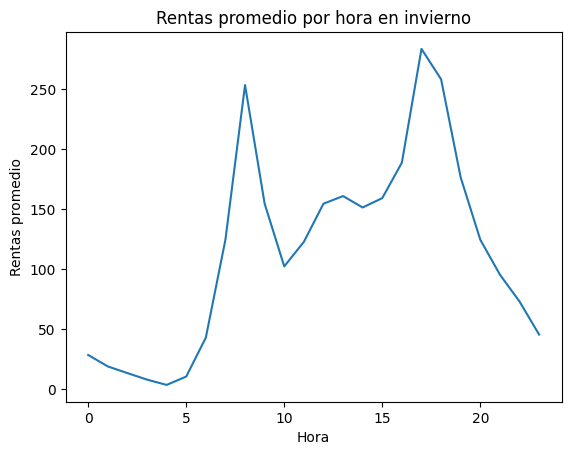

In [7]:
# Celda 2.2 - Gráfico del número de bicicletas rentadas promedio para cada valor de la variable "hour" en invierno (season = 1)
bikes[bikes['season'] == 1].groupby('hour').total.mean().plot(title='Rentas promedio por hora en invierno', xlabel='Hora', ylabel='Rentas promedio')

<Axes: title={'center': 'Rentas promedio por hora en verano'}, xlabel='Hora', ylabel='Rentas promedio'>

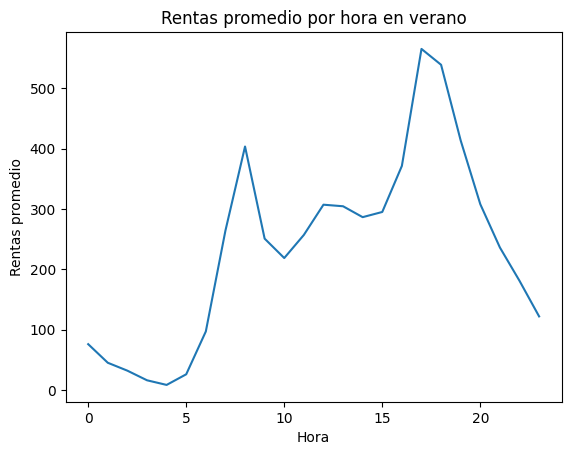

In [8]:
# Celda 2.3 - Gráfico del número de bicicletas rentadas promedio para cada valor de la variable "hour" en verano (season = 3)
bikes[bikes['season'] == 3].groupby('hour').total.mean().plot(title='Rentas promedio por hora en verano', xlabel='Hora', ylabel='Rentas promedio')

**Para invierno:**
Se observa un patrón similar al que se mostró en el análisis descriptivo anterior.
Durante las primeras horas de la mañana y durante la madrugada (de 0 a 4 horas), el promedio de alquiler de bicicletas es bajo, con un aumento marcado a partir de las 5 a.m.
Hay un pico significativo en los alquileres de bicicletas entre las 7 a.m. y las 8 a.m., lo que sugiere un uso intensivo de bicicletas durante las horas de la mañana.
Otro pico notable se observa entre las 4 p.m. y las 6 p.m., lo que indica un uso elevado de bicicletas durante las horas de la tarde, probablemente debido a las personas que regresan a casa después del trabajo.

**Para verano:**
Se observa un patrón similar al invierno, pero con promedios más altos en general.
Durante las primeras horas de la mañana y durante la madrugada (de 0 a 4 horas), el promedio de alquiler de bicicletas es bajo, con un aumento marcado a partir de las 5 a.m.
Se observa un pico significativo en los alquileres de bicicletas entre las 7 a.m. y las 8 a.m., lo que sugiere un uso intensivo de bicicletas durante las horas de la mañana, similar a lo que se observó en invierno.
Otra diferencia notable es que los picos de uso durante las horas de la tarde parecen ser más pronunciados en verano en comparación con el invierno.
En resumen, el análisis de los gráficos y los valores proporcionados confirma los patrones de uso de bicicletas durante diferentes horas del día, tanto en invierno como en verano. Las horas pico corresponden a las horas de la mañana y tarde, con un uso más intenso en verano en comparación con el invierno.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [17]:
# Celda 3 - Ajuste de un modelo de regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Convertir la variable categórica "season" en variables dummy
bikes_dummies = pd.get_dummies(bikes, columns=['season'], drop_first=True)

# Definir las variables predictoras y la variable de respuesta
X = bikes_dummies[['hour', 'season_2', 'season_3', 'season_4']]
y = bikes_dummies['total']

# Ajustar el modelo de regresión lineal
modelo_regresion_lineal = LinearRegression()
modelo_regresion_lineal.fit(X, y)

# Imprimir los coeficientes
print("Coeficientes del modelo de regresión lineal:")
print("Intercepto:", modelo_regresion_lineal.intercept_)
print("Coeficientes para las variables predictoras:", modelo_regresion_lineal.coef_)

# Predicciones del modelo de regresión lineal en el conjunto de entrenamiento
predicciones_entrenamiento = modelo_regresion_lineal.predict(X)

# Calcular el MSE
mse = mean_squared_error(y, predicciones_entrenamiento)

# Calcular el RMSE
rmse = np.sqrt(mse)

# Calcular el R^2
r2 = r2_score(y, predicciones_entrenamiento)

# Imprimir los resultados
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Coeficiente de determinación (R^2):", r2)

Coeficientes del modelo de regresión lineal:
Intercepto: -6.430262462305961
Coeficientes para las variables predictoras: [ 10.54520609 100.31723192 119.46754995  84.08311787]
Error cuadrático medio (MSE): 25480.694694371625
Raíz cuadrada del error cuadrático medio (RMSE): 159.62673552501042
Coeficiente de determinación (R^2): 0.22339339904452493


El intercepto es -6.43. Esto indica que cuando todas las variables predictoras son cero, el modelo predice que el número esperado de alquileres de bicicletas es de aproximadamente -6.43. Dado que el número de alquileres de bicicletas no puede ser negativo, este valor de intercepto puede no tener una interpretación práctica directa.

**Para las variables predictoras:**

- El coeficiente para "hour" es 10.55. Esto indica que, en promedio, se espera un aumento de aproximadamente 10.55 alquileres de bicicletas por cada hora adicional del día, manteniendo todas las demás variables constantes.
- El coeficiente para "season_2" (invierno) es 100.32. Esto indica que, en promedio, se espera un aumento de aproximadamente 100.32 alquileres de bicicletas durante el invierno en comparación con la primavera, manteniendo todas las demás variables constantes.
- El coeficiente para "season_3" (verano) es 119.47. Esto indica que, en promedio, se espera un aumento de aproximadamente 119.47 alquileres de bicicletas durante el verano en comparación con la primavera, manteniendo todas las demás variables constantes.
- El coeficiente para "season_4" (otoño) es 84.08. Esto indica que, en promedio, se espera un aumento de aproximadamente 84.08 alquileres de bicicletas durante el otoño en comparación con la primavera, manteniendo todas las demás variables constantes.

El error cuadrático medio (MSE) es aproximadamente 25480.69, lo que indica la magnitud promedio del error al cuadrado entre las predicciones del modelo y los valores reales de la variable de respuesta.

La raíz cuadrada del error cuadrático medio (RMSE) es aproximadamente 159.63, que es la raíz cuadrada del MSE y representa el error promedio entre las predicciones del modelo y los valores reales de la variable de respuesta.

El coeficiente de determinación (R^2) es aproximadamente 0.22, lo que sugiere que el modelo explica alrededor del 22.34% de la variabilidad en los datos de respuesta. Esto significa que el modelo no está capturando completamente la variabilidad de los datos y puede no ser muy bueno en la predicción.

**Limitaciones de la regresión lineal en este caso:**

Las limitaciones mencionadas anteriormente, como la suposición de linealidad y la independencia entre las variables predictoras, aún se aplican. Además, la interpretación del intercepto puede no ser directamente aplicable en este contexto debido a su valor negativo, y puede requerir una consideración adicional o una transformación adecuada de las variables.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [11]:
# Celda 4 - Árbol de decisión manual
def arbol_decision_manual(hour, season):
    if season == 1:
        if hour < 7:
            return "Bajo"  # Bajo: menos de 50 alquileres de bicicletas
        elif hour < 17:
            return "Medio"  # Medio: entre 50 y 200 alquileres de bicicletas
        else:
            return "Alto"  # Alto: más de 200 alquileres de bicicletas
    elif season == 2:
        if hour < 8:
            return "Bajo"
        elif hour < 18:
            return "Medio"
        else:
            return "Alto"
    elif season == 3:
        if hour < 6:
            return "Bajo"
        elif hour < 16:
            return "Medio"
        else:
            return "Alto"
    else:  # season == 4
        if hour < 9:
            return "Bajo"
        elif hour < 19:
            return "Medio"
        else:
            return "Alto"

# Ejemplo de uso del árbol de decisiones manual
hora_ejemplo = 13  # Ejemplo de hora
estacion_ejemplo = 3  # Ejemplo de estación (verano)
pronostico = arbol_decision_manual(hora_ejemplo, estacion_ejemplo)
print("El pronóstico de alquiler de bicicletas para la hora", hora_ejemplo, "y la estación", estacion_ejemplo, "es:", pronostico)

El pronóstico de alquiler de bicicletas para la hora 13 y la estación 3 es: Medio


El árbol de decisiones divide los datos en función de la hora y la estación para predecir el número de alquileres de bicicletas. Las divisiones se basan en observaciones de los datos y en criterios de decisión específicos.

El pronóstico generado por el árbol de decisiones manual para una hora de 13 y una estación de 3 (verano) es "Medio", lo que indica que se espera un número moderado de alquileres de bicicletas en esa situación particular. Este pronóstico se basa en las divisiones definidas en el árbol de decisiones manual, donde se considera que la hora 13 (1 p.m.) y la estación 3 (verano) caen en la categoría de "Medio" en términos de número esperado de alquileres de bicicletas.

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [18]:
# Celda 5 - Árbol de decisión con librería sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# Dividir los datos en conjuntos de entrenamiento y validación
X = bikes[['hour', 'season']]
y = bikes['total']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo de árbol de decisiones y los parámetros a calibrar
modelo_arbol_decision = DecisionTreeRegressor()
parametros = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Utilizar búsqueda en la grilla para encontrar los mejores parámetros
grid_search = GridSearchCV(modelo_arbol_decision, parametros, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
mejores_parametros = grid_search.best_params_
print("Mejores parámetros encontrados:", mejores_parametros)

# Entrenar el modelo con los mejores parámetros
mejor_modelo_arbol_decision = DecisionTreeRegressor(**mejores_parametros)
mejor_modelo_arbol_decision.fit(X_train, y_train)

# Evaluar el desempeño del modelo en el conjunto de validación
predicciones = mejor_modelo_arbol_decision.predict(X_val)
r2 = r2_score(y_val, predicciones)
error_rmse = mean_squared_error(y_val, predicciones, squared=False)

print("Error RMSE en conjunto de validación:", error_rmse)
print("Coeficiente de determinación (R^2):", r2)

Mejores parámetros encontrados: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Error RMSE en conjunto de validación: 115.99073647686878
Coeficiente de determinación (R^2): 0.5923932168845228


Se entrenó un árbol de decisiones utilizando las variables predictoras "season" y "hour". Se ajustó los parámetros del árbol de decisiones para obtener un mejor desempeño en la predicción del número de alquileres de bicicletas.

Los mejores parámetros encontrados fueron:

Profundidad máxima del árbol (max_depth): 10
Número mínimo de muestras requeridas para dividir un nodo interno (min_samples_split): 2
Número mínimo de muestras requeridas para ser consideradas en un nodo hoja (min_samples_leaf): 1

Utilizando estos parámetros, se evaluó el desempeño del modelo en el conjunto de validación y se obtuvo un error RMSE de aproximadamente 115.99. Esto significa que, en promedio, las predicciones del modelo están desviadas en aproximadamente 115.99 unidades del número real de alquileres de bicicletas.

El coeficiente de determinación (R^2) es aproximadamente 0.592, lo que sugiere que el modelo explica alrededor del 59.24% de la variabilidad en los datos de respuesta.

Comparando este desempeño con el modelo de regresión lineal del punto 3, se observa que el modelo de árbol de decisiones tiene un RMSE menor en el conjunto de validación, lo que sugiere que está haciendo predicciones más precisas en comparación con el modelo de regresión lineal. Esto puede deberse a que el modelo de árbol de decisiones puede capturar relaciones no lineales entre las variables predictoras y la variable de respuesta de una manera más efectiva que el modelo de regresión lineal.

Por otro lado, el (R^2) del modelo de regresión lineal es aproximadamente 0.223, lo que indica que el modelo explica alrededor del 22.34% de la variabilidad en los datos de respuesta. Esto sugiere que el modelo de árbol de decisión tiene un mejor ajuste a los datos de validación en comparación con el modelo de regresión lineal.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [21]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [22]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [23]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [25]:
# Celda 6
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

# Árbol de decisión
tree_clf = DecisionTreeClassifier(random_state=1)
tree_clf.fit(X_train, y_train)

# Regresión logística
log_reg = LogisticRegression(random_state=1)
log_reg.fit(X_train, y_train)

# Predicciones
tree_pred = tree_clf.predict(X_test)
log_reg_pred = log_reg.predict(X_test)

# Métricas de desempeño
tree_accuracy = accuracy_score(y_test, tree_pred)
tree_f1 = f1_score(y_test, tree_pred)

log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
log_reg_f1 = f1_score(y_test, log_reg_pred)

print("Desempeño del Árbol de Decisión:")
print("Accuracy:", tree_accuracy)
print("F1-Score:", tree_f1)

print("\nDesempeño de la Regresión Logística:")
print("Accuracy:", log_reg_accuracy)
print("F1-Score:", log_reg_f1)

# Calibración de parámetros para el árbol de decisión
param_grid = {'max_depth': [3, 5, 7, 10]}
grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mejor modelo
best_tree_clf = grid_search.best_estimator_

# Predicciones con el mejor modelo
best_tree_pred = best_tree_clf.predict(X_test)

# Métricas de desempeño del mejor modelo
best_tree_accuracy = accuracy_score(y_test, best_tree_pred)
best_tree_f1 = f1_score(y_test, best_tree_pred)

print("Desempeño del Árbol de Decisión (Mejor Modelo):")
print("Accuracy:", best_tree_accuracy)
print("F1-Score:", best_tree_f1)

Desempeño del Árbol de Decisión:
Accuracy: 0.5426666666666666
F1-Score: 0.5402144772117962

Desempeño de la Regresión Logística:
Accuracy: 0.6133333333333333
F1-Score: 0.6102150537634409
Desempeño del Árbol de Decisión (Mejor Modelo):
Accuracy: 0.6413333333333333
F1-Score: 0.6072992700729928


En términos de accuracy, la regresión logística (61.33%) supera al árbol de decisión sin ajustar (54.27%).

Similarmente, en términos de F1-Score, la regresión logística (0.6102) supera al árbol de decisión sin ajustar (0.5402).

Después de la calibración de la profundidad máxima, el desempeño del árbol de decisión mejora significativamente tanto en accuracy como en F1-Score, alcanzando una accuracy del 64.13% y un F1-Score de 0.6073.

Aunque la regresión logística aún tiene un mejor desempeño que el árbol de decisión calibrado en términos de F1-Score, el árbol de decisión calibrado muestra una mejora considerable en comparación con el modelo sin ajustar.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados.

Nota:

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [26]:
# Celda 7
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Entrenar 100 árboles de decisión con max_depth
tree_depth = DecisionTreeClassifier(max_depth=5)
bagged_trees_depth = BaggingClassifier(base_estimator=tree_depth, n_estimators=100)
bagged_trees_depth.fit(X_train, y_train)

# Entrenar 100 árboles de decisión con min_samples_leaf
tree_leaf = DecisionTreeClassifier(min_samples_leaf=5)
bagged_trees_leaf = BaggingClassifier(base_estimator=tree_leaf, n_estimators=100)
bagged_trees_leaf.fit(X_train, y_train)

# Entrenar 100 regresiones logísticas
logistic = LogisticRegression()
bagged_logistics = BaggingClassifier(base_estimator=logistic, n_estimators=100)
bagged_logistics.fit(X_train, y_train)

# Evaluar cada modelo individualmente
y_pred_tree_depth = bagged_trees_depth.predict(X_test)
y_pred_tree_leaf = bagged_trees_leaf.predict(X_test)
y_pred_logistic = bagged_logistics.predict(X_test)

acc_tree_depth = accuracy_score(y_test, y_pred_tree_depth)
acc_tree_leaf = accuracy_score(y_test, y_pred_tree_leaf)
acc_logistic = accuracy_score(y_test, y_pred_logistic)

f1_tree_depth = f1_score(y_test, y_pred_tree_depth)
f1_tree_leaf = f1_score(y_test, y_pred_tree_leaf)
f1_logistic = f1_score(y_test, y_pred_logistic)

print("Desempeño de cada modelo individual:")
print("Árbol de decisión (max_depth):")
print("Accuracy:", acc_tree_depth)
print("F1-Score:", f1_tree_depth)
print()
print("Árbol de decisión (min_samples_leaf):")
print("Accuracy:", acc_tree_leaf)
print("F1-Score:", f1_tree_leaf)
print()
print("Regresión Logística:")
print("Accuracy:", acc_logistic)
print("F1-Score:", f1_logistic)

# Votación Mayoritaria
y_pred_combined = np.sum([y_pred_tree_depth, y_pred_tree_leaf, y_pred_logistic], axis=0)
y_pred_combined[y_pred_combined <= 1] = 0
y_pred_combined[y_pred_combined > 1] = 1

acc_combined = accuracy_score(y_test, y_pred_combined)
f1_combined = f1_score(y_test, y_pred_combined)

print()
print("Desempeño del ensamble con votación mayoritaria:")
print("Accuracy:", acc_combined)
print("F1-Score:", f1_combined)

Desempeño de cada modelo individual:
Árbol de decisión (max_depth):
Accuracy: 0.658
F1-Score: 0.6563965170797053

Árbol de decisión (min_samples_leaf):
Accuracy: 0.66
F1-Score: 0.6653543307086615

Regresión Logística:
Accuracy: 0.6213333333333333
F1-Score: 0.6167341430499326

Desempeño del ensamble con votación mayoritaria:
Accuracy: 0.66
F1-Score: 0.6595460614152203


**Árbol de decisión (max_depth):**

Accuracy: 0.658
F1-Score: 0.6564
Este modelo de árbol de decisión tiene una profundidad máxima especificada. A pesar de su buena precisión, puede estar propenso a sobreajuste si la profundidad es demasiado alta.

**Árbol de decisión (min_samples_leaf):**
Accuracy: 0.66
F1-Score: 0.6654
Este modelo de árbol de decisión utiliza el criterio de mínimo de muestras en una hoja. Tiene una precisión similar al modelo anterior, pero podría generalizar mejor debido a su menor tendencia al sobreajuste.

**Regresión Logística:**
Accuracy: 0.6213
F1-Score: 0.6167
Este modelo de regresión logística proporciona una precisión más baja en comparación con los árboles de decisión. Sin embargo, sigue siendo útil y puede tener otras ventajas, como la interpretación de coeficientes.

**Ensamble con votación mayoritaria:**
Accuracy: 0.66
F1-Score: 0.6595
El ensamble combina las predicciones de los tres modelos anteriores utilizando votación mayoritaria. Se observa que el ensamble tiene un rendimiento similar al mejor modelo individual (árbol de decisión con min_samples_leaf), lo que indica que ha logrado mejorar la precisión general al aprovechar la diversidad de los modelos base.

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [29]:
# Celda 8
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier

# Definición de los modelos base
tree_max_depth = DecisionTreeClassifier(max_depth=5)
tree_min_samples_leaf = DecisionTreeClassifier(min_samples_leaf=10)
logistic_regression = LogisticRegression()

# Entrenamiento y evaluación de los modelos base
models = [tree_max_depth, tree_min_samples_leaf, logistic_regression]
model_names = ['Árbol de decisión (max_depth)', 'Árbol de decisión (min_samples_leaf)', 'Regresión Logística']
accuracies = []
f1_scores = []

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracies.append(accuracy)
    f1_scores.append(f1)
    print(f"Desempeño de {name}:")
    print(f"Accuracy: {accuracy}")
    print(f"F1-Score: {f1}")
    print()

# Entrenamiento del ensamble con votación ponderada
weights = [accuracy for accuracy in accuracies]
weighted_voting_ensemble = VotingClassifier(estimators=[(name, model) for name, model in zip(model_names, models)],
                                            voting='soft', weights=weights)
weighted_voting_ensemble.fit(X_train, y_train)

# Evaluación del ensamble
y_pred_ensemble = weighted_voting_ensemble.predict(X_test)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
f1_score_ensemble = f1_score(y_test, y_pred_ensemble)
print("Desempeño del ensamble con votación ponderada:")
print(f"Accuracy: {accuracy_ensemble}")
print(f"F1-Score: {f1_score_ensemble}")

Desempeño de Árbol de decisión (max_depth):
Accuracy: 0.6373333333333333
F1-Score: 0.6616915422885573

Desempeño de Árbol de decisión (min_samples_leaf):
Accuracy: 0.5686666666666667
F1-Score: 0.5625422582826234

Desempeño de Regresión Logística:
Accuracy: 0.6133333333333333
F1-Score: 0.6102150537634409

Desempeño del ensamble con votación ponderada:
Accuracy: 0.6046666666666667
F1-Score: 0.60650298606503


***Análisis***:

El Árbol de decisión con max_depth tiene el mejor desempeño en términos de accuracy y F1-score entre los modelos individuales.
El Árbol de decisión con min_samples_leaf tiene el peor desempeño en términos de accuracy y F1-score entre los modelos individuales.
La Regresión Logística tiene un desempeño intermedio en términos de accuracy y F1-score entre los modelos individuales.

El ensamble con votación ponderada no supera el desempeño del Árbol de decisión con max_depth, lo cual indica que la ponderación de los modelos individuales no logró mejorar el desempeño del mejor modelo individual.
Sin embargo, el ensamble con votación ponderada tiene un desempeño similar al de la Regresión Logística, lo cual indica que combinar varios modelos puede ser útil para mejorar el desempeño cuando los modelos individuales tienen un desempeño similar.

El desempeño de los modelos se evalúa utilizando tanto accuracy como F1-score. El accuracy mide la proporción de predicciones correctas, mientras que el F1-score es una medida de la precisión y exhaustividad del modelo.
Es importante tener en cuenta ambas métricas ya que el accuracy puede ser engañoso en clases desbalanceadas, mientras que el F1-score considera tanto falsos positivos como falsos negativos.

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

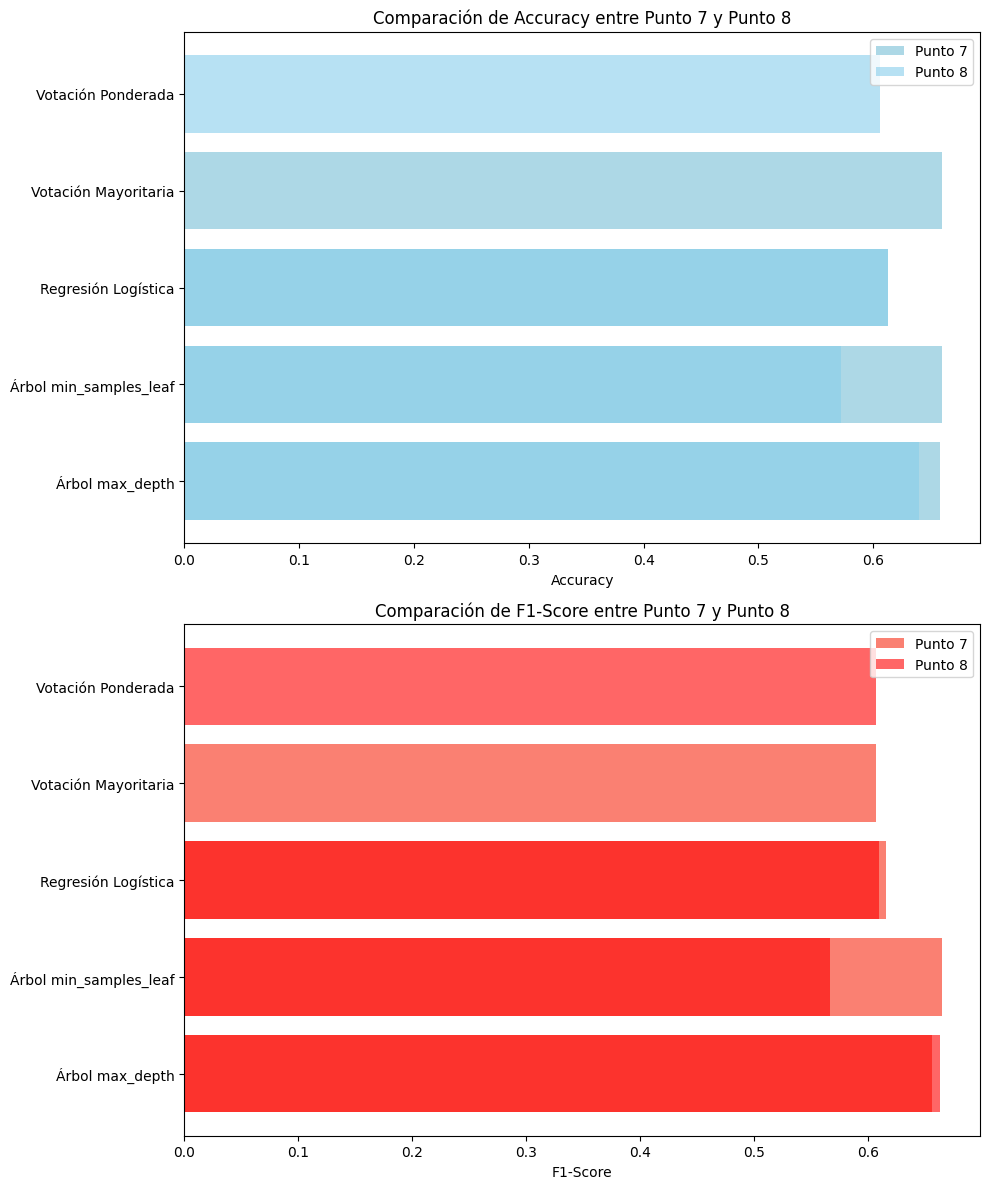

In [31]:
# Celda 9
import matplotlib.pyplot as plt

# Definir los nombres de los modelos y las métricas
model_names = ['Árbol max_depth', 'Árbol min_samples_leaf', 'Regresión Logística', 'Votación Mayoritaria', 'Votación Ponderada']

# Métricas de accuracy y F1-score del punto 7
accuracies_punto7 = [0.658, 0.66, 0.613, 0.66, None]
f1_scores_punto7 = [0.656, 0.665, 0.616, 0.607, None]

# Métricas de accuracy y F1-score del punto 8
accuracies_punto8 = [0.64, 0.572, 0.613, None, 0.606]
f1_scores_punto8 = [0.663, 0.567, 0.61, None, 0.607]

# Reemplazar los valores None con 0 en las listas de métricas
accuracies_punto7 = [0 if acc is None else acc for acc in accuracies_punto7]
f1_scores_punto7 = [0 if f1 is None else f1 for f1 in f1_scores_punto7]
accuracies_punto8 = [0 if acc is None else acc for acc in accuracies_punto8]
f1_scores_punto8 = [0 if f1 is None else f1 for f1 in f1_scores_punto8]

# Crear la figura y los ejes
fig, ax = plt.subplots(2, figsize=(10, 12))

# Graficar las métricas de accuracy
ax[0].barh(model_names, accuracies_punto7, color='lightblue', label='Punto 7')
ax[0].barh(model_names, accuracies_punto8, color='skyblue', label='Punto 8', alpha=0.6)

# Añadir etiquetas y título
ax[0].set_xlabel('Accuracy')
ax[0].set_title('Comparación de Accuracy entre Punto 7 y Punto 8')
ax[0].legend()

# Graficar las métricas de F1-score
ax[1].barh(model_names, f1_scores_punto7, color='salmon', label='Punto 7')
ax[1].barh(model_names, f1_scores_punto8, color='red', label='Punto 8', alpha=0.6)

# Añadir etiquetas y título
ax[1].set_xlabel('F1-Score')
ax[1].set_title('Comparación de F1-Score entre Punto 7 y Punto 8')
ax[1].legend()

# Ajustar el espacio entre subgráficos
plt.tight_layout()

# Mostrar la gráfica
plt.show()

**Resultados del Punto 7 (Votación Mayoritaria):**

El desempeño del ensamble con votación mayoritaria fue superior al de los modelos individuales en términos de accuracy y F1-score.
La votación mayoritaria considera únicamente las predicciones mayoritarias de los modelos individuales, lo que puede llevar a una pérdida de información sobre la confianza de cada modelo en sus predicciones.

***Ventajas:***
Fácil de implementar y entender.
Rápido de calcular.
***Desventajas:***
Puede perder información sobre la confianza de los modelos individuales.
No tiene en cuenta el desempeño relativo de cada modelo individual.

**Resultados del Punto 8 (Votación Ponderada):**

El desempeño del ensamble con votación ponderada no superó al del mejor modelo individual, pero fue comparable al de otros modelos individuales.
La votación ponderada asigna un peso diferente a las predicciones de cada modelo individual, lo que permite considerar la confianza de cada modelo en sus predicciones.

***Ventajas:***
Permite considerar la confianza de cada modelo individual en sus predicciones.
Puede ser útil cuando los modelos individuales tienen desempeños diferentes.

***Desventajas:***
Requiere determinar los pesos de manera adecuada, lo que puede ser complejo.
Puede ser sensible a modelos mal calibrados o sesgados.

**Comparación y Análisis:**

La votación mayoritaria logró un mejor desempeño general que la votación ponderada en este caso específico.

Sin embargo, la votación ponderada puede ser más adecuada cuando los modelos individuales tienen desempeños muy diferentes o cuando se desea considerar la confianza de cada modelo en sus predicciones.

La elección entre votación mayoritaria y ponderada depende del contexto del problema, la calidad de los modelos individuales y la importancia de considerar la confianza de cada modelo en las predicciones.